## k-최근접 이웃 알고리즘
- 지도학습 알고리즘 중 하나이다
- 굉장히 직관적이고 간단한 알고리즘이다
- 어떤 데이터가 주어지면 그 주변(이웃)의 데이터를 살펴본 뒤 많은 데이터가 포함되어 있는 범주로 분류하는 방식이다
- knn의 특징은 훈련이 따로 필요없다는 것이다. 다른 모델들은 fit(X_train, y_train)의 코드를 통해 훈련을 시킨다. 즉, 훈련데이터를 기반으로 모델을 만들고 테스트 데이터로 테스트하는 방식이지만 knn은 훈련데이터를 저장하는게 훈련의 전부이다
- 모델을 별도로 구축하지 않는다는 뜻으로 게으른 모델(Lazy model)이라고 부른다

## 필요한 패키지 로딩

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 데이터셋 로딩

In [39]:
## 도미의 관측 데이터셋 
## 도미 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
## 도미 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [40]:
len(bream_length)

35

In [41]:
# 빙어 관측 데이터셋
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [42]:
len(smelt_length)

14

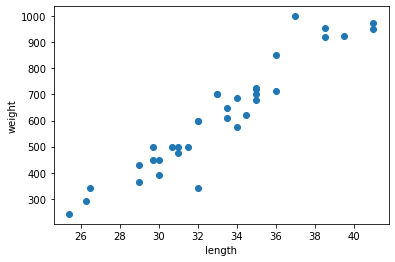

In [43]:
# feature(특성, 속성)간의 관계를 시각화하는 scatter plot(산점도 or 산포도)
# 연관성을 볼때 시각화를 쓰면 한눈에 보임
# 길이를 x, 무게를 y
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 양의 상관관계를 보임
# 관측값들이 직선을 보임 - 선형적
# 도미는 길이와 무게가 상관관계가 있다

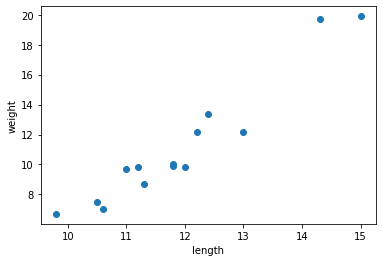

In [44]:
# 빙어 산점도 그래프 시각화
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 양의 상관관계가 있는것처럼 보임

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 두 데이터셋을 한번에 시각화
# 원본 데이터대로 나타난다
# 정답에 해당되는 라벨이 하나 더 있어야 한다
# 컴퓨터가 처리할수있는 언어 0과 1로 나타내줘야함
# 우리가 찾아낼 도미를 1로, 빙어를 0로 타겟값을 줘야함 
# feature가 두개 길이와 무게
# 도미와 빙어의 무게와 길이를 합쳐서 각각 feature 하나로 만듦
# target

In [ ]:
# 머신러닝 패키지를 사용할 경우 특성들을 2차원 Numpy 배열로 만들어줘야 한다
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [ ]:
# 2차원 배열을 생성하기 위해 zip()함수와 리스트내포를 사용한다
# zip() : 나열된 리스트에서 요소를 하나씩 꺼내주는 역할을 하는 함수
# == map()과 유사한 기능
fish_data = [[l, w] for l, w in zip(length, weight)]
fish_data

In [ ]:
# 도미(1), 빙어(0)
# 머신에서 찾고자 하는 것에 1을 나머지는 0으로 둔다
# 도미 데이터셋은 35개, 빙어 데이터셋은 14개
fish_target = [1] * 35 + [0] * 14
fish_target

### knn 알고리즘 : 2진 분류 알고리즘

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# 첫글자가 대문자 = 클래스
# 클래스에 접근하려면 인스턴스 객체를 먼저 생성해야함
# 싸이킷run 사이트에가면 이 클래스의 기본 파라미터를 볼 수 있음
# 기본값을 그냥 사용하려고 함

knn = KNeighborsClassifier()
# 훈련 - 모델에 데이터를 전달하여 규칙을 학습하는 과정을 말한다
model = knn.fit(fish_data, fish_target)

# 평가(정확도 검사)
model.score(fish_data, fish_target)
# 1.0 나옴 ..  정확도 100%라는 소리
# 학습시킨거 안에서 나온 문제라 정확도 100인게 중요하지 않음
# 훈련용 데이터와 테스트 데이터를 분리해야 정확하게 볼 수 있음

NameError: name 'fish_data' is not defined

In [ ]:
# import한 KNeighborsClassifier 클래스의 객체를 먼저 만든다.
knn = KNeighborsClassifier()

# 이 객체에 fish_data와 fish_target을 전달하여 도미를 찾기 위한 기준을 학습시키는 것을 훈련이라고 한다.
# 사이킷런에서는 fit()메소드가 이런 역할을 한다.
# 가까이에 있는 것을 어떻게 알까? distance라는 거리를 통해 알 수 있다.
# knn에서는 두가지 기법이 있다.

# 이제 훈련을 시킬 것이다. - 모델 데이터를 전달하여 규칙을 학습하는 과정을 말한다.
model = knn.fit(fish_data, fish_target)
#fish_data문제, fish_target문제에 대한 정답
#fit() 주어진 데이터로 알고리즘을 훈련시킨 뒤 훈련한다.

# 평가(정확도 검사)
model.score(fish_data, fish_target)

#결과값이 1은 정확도가 100%라는 것이다.
#knn은 데이터를 갖고 있는데 그것으로 모델을 만들고 평가하면 100%밖에 나올 수 없다.
# 100

In [ ]:
# knn 학습모델
knn.fit(fish_data, fish_target)

In [ ]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# algorithm = auto : 최적화
# leaf_size : 메모리 점유율
# metric='minkows : 유클리안 --을 사용햇다
# p=2 : 1이면 맨하탄거리 계산법 2이면 유클리안 거리 계산법
# KN의 핵심은 가장 적절한 k를 찾아내는 것
# weights='uniform' : 하이퍼파라미터(가중치)를 균등하게 부여 
#                   : distance : 거리에 따른 가중치를 차등 부여
#                   : 강력하게 알고리즘을 사용햇다는 뜻
# k 값을 적게잡으면 비교할 대상이 딱히 없음. 과대적합이 일어남
# 산발된 데이터셋을 일일히 이어서 모델을 만들면
# 새로운 데이터가 들어왓을때 적합하지 않고 일반화가 이루지지 않음
# 그래서 최적화된 직선을 긋는것..

In [ ]:
# 예측 - 새로운 데이터를 추가하여 분류하는 작업
# 길이 - 30, 무게 600인 데이터
knn.predict([[30, 600]])
# 얘는 아마 도미 '1'로 나올것

In [ ]:
new_data = [30, 600]

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker = '^', color = 'r')
plt.plot()
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 기존의 산점도 그래프에 띄워봄

In [ ]:
model._fit_X
# X : 이 모델을 만들때 사용햇던 데이터 셋 (fish)

In [ ]:
knn._fit_X
# knn도 fish 데이터를 다 갖고있음
# 메모리를 많이 차지하고 있음

In [ ]:
model._y
# 우리가 갖고 있는 49개의 target 데이터

In [ ]:
knn._y
# 물론 얘도

In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49)
# 이렇게 집어넣으면 데이터가 많은 도미를 인식해서 도미라고 분류해버림
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)
# 정확도 100 아닐거임
# 1에서 100정도까지 이 과정을 반복하면 최적의 k값을 얻을 수 있음

In [ ]:
35 / 49
# 갖고있는 총 데이터중에 도미데이터 갯수.. 정확도가 이렇게 나온거

## 훈련 데이터와 테스트 데이터

In [ ]:
print(type(fish_data))
print(type(fish_target))
# 리스트는 슬라이싱으로 분리 가능
# 인덱스 시작은 0

In [ ]:
# 훈련데이터 35개, 테스트데이터 14개로 분리하는 작업
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [ ]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)
# 샘플의 편향 때문에 0%가 나옴
# 모델학교가서 대한민국 평균키 샘플 추출한거나 다름없음
# 이렇게 훈련데이터 테스트데이터를 나누면 안된다

In [ ]:
# numpy 배열을 이용하여 데이터를 섞는 작업
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [ ]:
input_arr

In [ ]:
input_arr.shape
# 2개의 관측값을 가짐

In [ ]:
target_arr.shape
# 크기 49개

In [ ]:
# 넘파이 배열은 0부터 인덱스 시작
# 인덱스를 섞을것
# input_arr과 target_arr은 같은 위치에 함계 선택되어야 함
np.random.seed(42)
index = np.arange(49)
# 마지막 값인 49를 주면 모든 데이터
# shuffle() 무작위로 섞음
np.random.shuffle(index)

In [ ]:
index
# 섞인거 확인

In [ ]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [ ]:
print(input_arr[13], train_input[0])
# input_arr의 13번째는 train_input의 0번째가 됏는지 확인해보기

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
# x축 y축으로 담으려고 분리해서 쓰는거
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

## 데이터 전처리(data preprocessing)

In [ ]:
fish_data[:5]

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
# column_stack()
np.column_stack([[1, 2, 3], [4, 5, 6]])
# 데이터가 두개라 리스트나 튜플로 또 묶어줘야 됨
# 이제 넘파이 배열이 돼서 머신에 돌릴 수 잇음 데이터준비끝

In [ ]:
fish_data = np.column_stack([fish_length, fish_weight])
fish_data[:5]
# 2차원 배열의 형태를 갖고잇음

In [ ]:
# np.zeros(), np.ones() 각각 0와 1을 만들어주는 함수
fish_target = np.concatenate([np.ones(35), np.zeros(14)])
# 리스트와 튜플 뭐든 상관없음
fish_target
# 찍어보면 넘파이 배열이 돼서 머신에 돌릴 수 잇음 데이터준비끝

### 훈련 데이터와 테스트 데이터 분리

In [10]:
from sklearn.model_selection import train_test_split

train_input, teat_input, train_target, test_target = train_test_split(\
                                                                     fish_data, fish_target, random_state=42)

NameError: name 'fish_data' is not defined

In [ ]:
print(train_input.shape, test_input.shape)
# 36개와 13개로 분리됨
# 이 함수는 기본적으로 25% 정도를 테스트 세트로 떼어낸다.
# 반올림/반내림은 알아서 최적화된 값으로 반환해준다

In [ ]:
test_target
# 찍어보니 아무래도 도미 데이터가 너무 많고 전체 데이터가 적어서 도미에 편향되긴 함


In [ ]:
# stratify : 클래스 비율에 맞춰서 데이터를 분리하도록 조정하는 옵션
# 훈련데이터가 적거나 특정 클래스의 샘플 개수가 적을 때 유용하게 사용된다.
train_input, test_input, train_target, test_target = train_test_split(\
                                                                      fish_data, fish_target,stratify=fish_target, random_state=42)

# 훈련데이터가 작거나 편중되어 있을 때 class비율에 맞춰서~ strarity= fish_target
test_target                                                                                   

In [ ]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
# 학습은 트레이닝 데이터로 함
# fit : 인스턴스 객체 만든 다음에 학습 시키는 것 
# 평가는 테스트 데이터로 함
kn.score(test_input, test_target)

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.predict([[25, 150]])
# 우리는 도미로 분류할거라 생각햇는데 얘는 빙어로 분류함

In [ ]:
# 왜 그런지 시각화에 같이 띄워보자
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# kneighbors() : 이웃까지의 거리와 이웃의 샘플의 인덱스를 반환하는 함수
distances, indexes = kn.kneighbors([[25, 150]])

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 거리도 뽑아봐야 알것같음
train_input[indexs]

In [ ]:
# 타겟 데이터로 보자
train_target[indexs]
# 주변에 빙어가 4개라고 나오네
# 근데 산점도를 눈으로 봣을때는 빙어가 특별히 가까워보이지 않는데
# 길이가 달라서 산점도상에 표현이 잘 안된것같다는 의심

In [ ]:
distances

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim((0, 1000)) 
# Y축과 단위차이가 많이 나서 한번 맞춰봄
plt.show()

### 피처 스케일링
- 두 특성의 스케일(scale)이 다를 때, 데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다
- 최소 - 최대 정규화(min-max normalization) : X<sub>new</sub> = X-min(x) / max(x) - min(x)
- z-점수 표준화(z-value standadization) : X<sub>new</sub> = X-mean(x) / std(x)

In [ ]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [ ]:
train_scaled = (train_input - mean) / std
# 스케일링

In [ ]:
new = ([25, 150] - mean) / std
# 이것도 스케일링
plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 그림은 똑같은데 축값이 달라짐

In [ ]:
test_scaled = (test_input - mean) / std
# 테스트 데이터도 스케일링

In [ ]:
kn.fit(train_scaled, train_target)

In [ ]:
kn.score(test_scaled, test_target)

In [ ]:
kn.predict([new])
# 이제 제대로 나옴

In [ ]:
# 여기까지 한 내용들을 이해할 수 있어야 앞으로 개고생안한다

### 훈련 데이터와 테스트 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 분꽃(iris) 품종 분류 분석

### 데이터셋 로딩

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
# Bunch 클래스 객체는 파이썬의 딕셔너리와 비슷하다. 키와 밸류로 이뤄짐
iris
# 확인해보면 넘파이 2차원 배열이라고 알려줌 {'data':array }

In [ ]:
print('iris의 키 : \r', iris.keys())
# 딕셔너리의 키값만 얻어올때 .keys()
# \r 한칸내리기

In [ ]:
print(iris['DESCR'][:193] + "\n...")
# 너무 많으니까 193번째까지만 가져오고
# 엔터쳐서 보기편하게

In [ ]:
# 데이터프레임으로 변환하여 내용 확인
df = pd.DataFrame(iris.data, columns = iris.feature_names)
sy = pd.Series(iris.target, dtype = 'category')
# 타켓을 갖고와서 시리즈 객체로 만든다음 데이터프레임에 추가하려고
# 데이터프레임은 하나하나 시리즈로 만들어진거니까
# 이렇게만 들고오면 0,0,0,0,1,1,1,1이니까 치환해줘야함
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail()
# 끝에만 한번 보기
# 데이터프레임으로 만들면 시각화하기 쉽다

In [ ]:
iris['data'].shape
# 150개의 관측값에 4개의 속성으로 이뤄짐

In [ ]:
iris['target'].shape

### 훈련 데이터와 테스트 데이터 분리
- 머신을 돌리기위해서는 훈련 데이터와 테스트 데이터로 분리해야 함
- 과대적합(훈련 데이터에 너무 과하게 적합)을 피하기위해
- 훈련 데이터(훈련세트) : 머신러닝 모델을 만들 때 사용
- 테스트 데이터(테스트세트, 홀드아웃세트) : 모델이 얼마나 잘 작동하는지 측정하는데 사용

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],
                                                   random_state=0)
# random_state=0 : 시드값주는것데 0보다 크기만하면 다 상관없음

In [ ]:
print('X_train 크기 : ', X_train.shape)
print('y_train 크기 : ', y_train.shape)
# 문제가 112개면 답도 112개

In [ ]:
print('X_test 크기 : ', X_test.shape)
print('y_test 크기 : ', y_test.shape)
# 112 + 38 = 150
# 잘 분할됏음

### 데이터 살펴보기

In [ ]:
# 여러개의 데이터를 한번에 보여주는 산점도 행렬 그래프 
# pd.plotting.scatter_matrix
# iris는 속성이 4개니까

In [ ]:
iris_df = pd.DataFrame(X_train, columns = iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins':20}, s = 60, alpha =.8)
# 아까 만들었던 species 컬럼은 빼고 만들기
# figsize =그림 크기

In [ ]:
import seaborn as sns
sns.pairplot(df, hue='species')
# 훨씬더 빠르게 시각화 가능
# 게다가 이쁨

### knn 최근접 이웃 알고리즘(단점 : 적절한 k의 선택이 필요하다)
- k가 너무 작을 때 : Overfitting(과대적합)
- k가 너무 클 때 : Underfitting(과소적합)
- 모델이 복잡할수록 훈련 데이터에 대해서는 더 정확하게 예측한다
- 우리가 찾으려는 모델은 일반화 성능이 최대가 되는 최척점에 있는 모델이다

In [3]:
!pip install mglearn

In [4]:
import mglearn

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
# 가장 최적의 k를 찾으려고 하는것
# 반복문으로 정확도 가장 높은 것 찾기

In [ ]:
knn.fit(X_train, y_train)
# 별도의 옵션을 주지않아서 이렇게만 뜸

In [ ]:
print('훈련세트의 정확도 : \n{:.2f}'.format(knn.score(X_train, y_train)))
# 소숫점 이하 두번째 자리까지 보기
# .format 오랜만이다

### 예측하기

In [ ]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print('X_new.shape : ', X_new.shape)
# 1행 4열

In [ ]:
prediction = knn.predict(X_new)
print('예측 : ', prediction)
print('예측한 타겟의 이름 : ', iris['target_names'][prediction])

### 모델 평가하기

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print('테스트 데이터에 대한 예측값 : \n', y_pred)

In [ ]:
for i in range(0, len(y_pred)):
    yhat = y_pred[i]
    print('{} : {}'.format(X_test[i], iris['target_names'][yhat]))

In [ ]:
print('테스트 데이터의 정확도: {:.2f}'.format(knn.score(X_test, y_test)))

In [ ]:
print('테스트 데이터의 정확도: {:.2f}'.format(np.mean(y_pred == y_test)))

In [ ]:
y_pred == y_test

In [ ]:
y_pred

In [ ]:
y_test

- 사이킷런 패키지는 metrics 서브패키지에서 다음처럼 다양한 분류용 성능평가 명령을 제공한다.
1. confusion_matrix(y_true, y_pred)
2. accuracy_score(y_true, y_pred)
3. precision_score(y_true, y_pred)
4. recall_score(y_true, y_pred)
5. fbeta_score(y_true, y_pred, beta)
6. f1_score(y_true, y_pred)
7. classfication_report(y_true, y_pred)
8. roc_curve
9. auc

### 최적의 k값 찾기

In [6]:
from sklearn.metrics import accuracy_score

# 1 ~ 100

ks = 100
mean_acc = np.zeros((ks-1))

for k in range(1, ks):
    clf = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc[k-1] = accuracy_score(y_test, yhat)
    
print(mean_acc)
# 찍어보기
# 숫자로 돼잇는건 보기어려움

NameError: name 'X_train' is not defined

In [ ]:
# 시각화로 한눈에 보기
plt.plot(range(1, ks), mean_acc, 'r')
plt.xlabel('Number of Neighbors(k)')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()
# 보면 정확도 0.97 == 97%에서 끝나는걸 확인할 수 있음

## 와인 데이터
- 와인의 화학 성분을 사용하여 와인의 종류를 예측하기 위한 데이터 셋

In [33]:
from sklearn.datasets import load_wine
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [35]:
len(target_names)

NameError: name 'target_names' is not defined

In [34]:
print('wine의 키 : \n', wine.keys())

wine의 키 : 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [ ]:
plt.scatter(data, target)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [36]:
# 필요한 패키지 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

- 컬럼의 종류
- fixed acidity : 고정 산도
- volatile acidity : 휘발성 산도
- citric acid : 시트르산
- residual sugar : 잔류 당분
- chlorides : 염화물
- free sulfur dioxide : 자유 이산화황
- total sulfur dioxide : 총 이산화황
- density : 밀도
- pH
- sulphates : 황산염
- alcohol
- quality : 0 ~ 10(높을 수록 좋은 품질)

## 유방암 진단 데이터
- 유방암(breast cancer)진단 데이터 셋
- 유방암 진단 사진으로부터 측정한 종양(tumor)의 특정값을 사용하여 종양이 양성(begin)인지 악성(malignant)인지 하는 판별하는 예제

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0